In [1]:
print("Ho")

Ho


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='alive'>

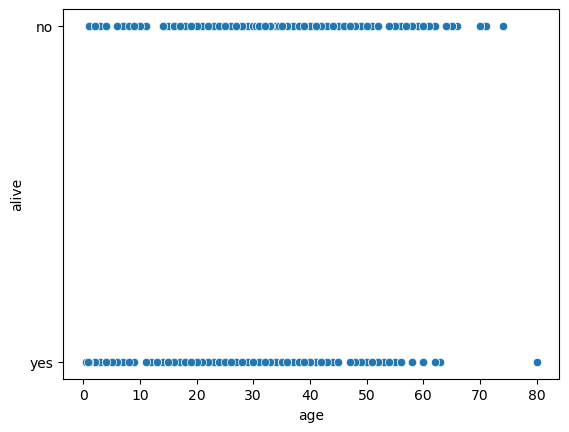

In [9]:
sns.scatterplot(data=df,
               x="age",
               y="alive")

# Logistic Regression


# 1. Data extraction


SPecifying X(I/D) & y(D) column

In [18]:
df=pd.read_csv("C:/Users/Welcome/Downloads/diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
df1=df.drop(['Outcome'], axis="columns")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,500,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,102
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
df2=df['Outcome']
df2

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# 2. Splitting data into test train split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [38]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
534,1,77,56,30,56,33.3,1.251,24
641,4,128,70,0,0,34.3,0.303,24
73,4,129,86,20,270,35.1,0.231,23
332,1,180,0,0,0,43.3,0.282,41
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
299,8,112,72,0,0,23.6,0.840,58
291,0,107,62,30,74,36.6,0.757,25
699,4,118,70,0,0,44.5,0.904,26
624,2,108,64,0,0,30.8,0.158,21


In [39]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
237,0,179,90,27,0,44.1,0.686,23
177,0,129,110,46,130,67.1,0.319,26
485,0,135,68,42,250,42.3,0.365,24
192,7,159,66,0,0,30.4,0.383,36
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
765,5,121,72,23,112,26.2,0.245,30
447,0,95,80,45,92,36.5,0.330,26
318,3,115,66,39,140,38.1,0.150,28
48,7,103,66,32,0,39.1,0.344,31


# Model Building

In [40]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg

LogisticRegression()

In [44]:
lg.fit(X_train,y_train) # train the model


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred = lg.predict(X_test) 
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [49]:
lg.score(X_test,y_test) #score of the model

0.7792207792207793

# Model Performance

In [53]:
 from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix

In [55]:
score=f1_score(y_pred,y_test)
score

0.5952380952380952

In [56]:
precision = precision_score(y_pred,y_test)
precision

0.5

In [57]:
recall = recall_score(y_pred,y_test)
recall

0.7352941176470589

In [58]:
con_mat = confusion_matrix(y_pred,y_test)
con_mat

array([[95, 25],
       [ 9, 25]], dtype=int64)